<a href="https://colab.research.google.com/github/rkgupta7463/Computer-Visions-Projects/blob/main/Plant_Disease_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

 98% 1.23G/1.25G [00:10<00:00, 155MB/s]
100% 1.25G/1.25G [00:10<00:00, 126MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/plant-disease-recognition-dataset.zip",'r')
zip.extractall("/content/plant-disease-recognition-dataset")
zip.close()

In [ ]:
directory=os.path.join('/content/plant-disease-recognition-dataset')
train_dir=os.path.join(directory,'Train/Train')
test_dir=os.path.join(directory,'Test/Test')
val_dir=os.path.join(directory,'Validation/Validation')

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
seed=1334
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(255, 255),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    shuffle=True,  # Shuffle the data
    seed=seed
)

Found 1322 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Don't shuffle the test data
    seed=seed
)

Found 150 images belonging to 3 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Don't shuffle the test data
    seed=seed
)

Found 60 images belonging to 3 classes.


In [ ]:
train_generator.class_indices,test_generator.class_indices,val_generator.class_indices

({'Healthy': 0, 'Powdery': 1, 'Rust': 2},
 {'Healthy': 0, 'Powdery': 1, 'Rust': 2},
 {'Healthy': 0, 'Powdery': 1, 'Rust': 2})

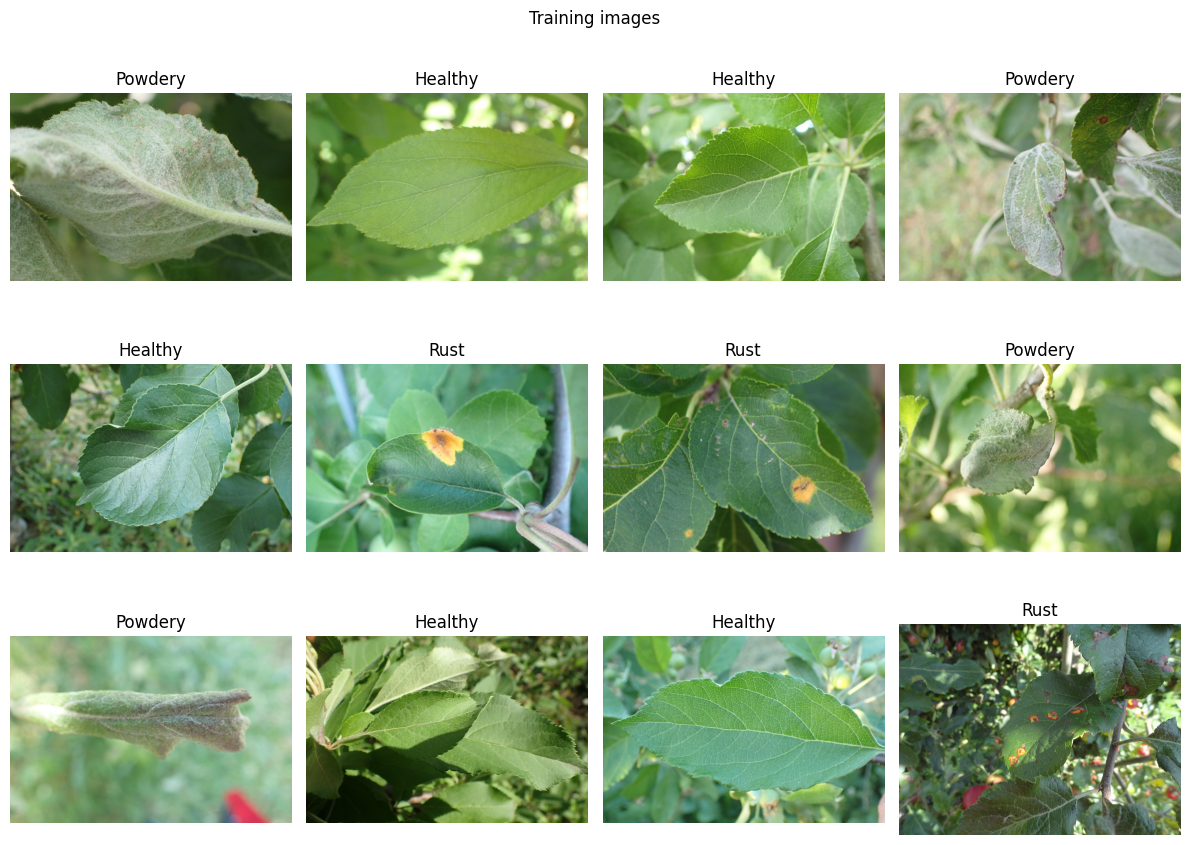

In [ ]:
import random
from PIL import Image


filenames = train_generator.filenames

# Randomly select 12 filenames (matching the 3x4 grid)
sampled_filenames = random.sample(filenames, 12)

rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 9))

for i, filename in enumerate(sampled_filenames):
    # Split the filename by the "/"
    parts = filename.split("/")

    # Take the first part of the split filename
    first_part = parts[0]

    # Combine the directory path with the first part
    image_path = train_dir+ "/" + filename

    # Load the image using PIL
    image = Image.open(image_path)

    # Determine the row and column for the current image
    row = i // cols
    col = i % cols

    # Display the image in the specified row and column
    axes[row, col].imshow(image)

    # Set the title to the first part of the filename
    axes[row, col].set_title(first_part)
    axes[row, col].axis('off')

plt.suptitle("Training images")
plt.tight_layout()
plt.show()

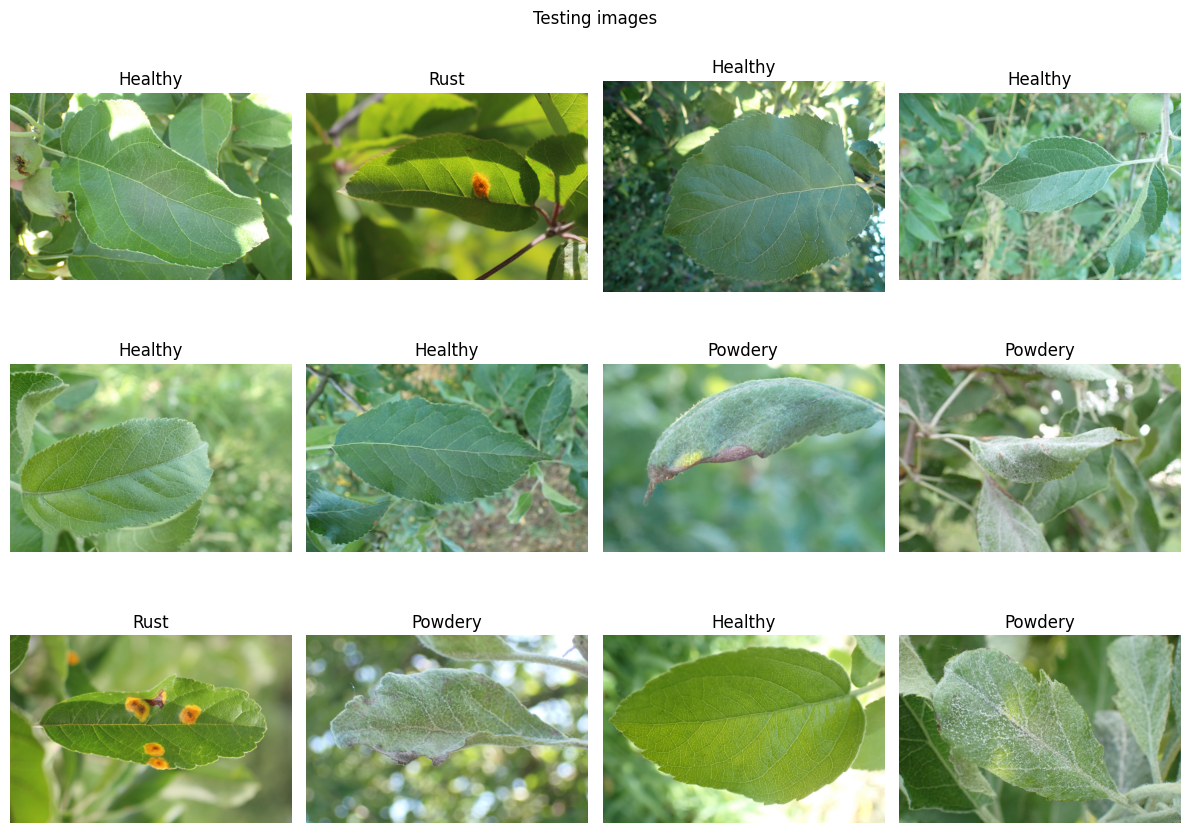

In [ ]:
import random
from PIL import Image


filenames = test_generator.filenames

# Randomly select 12 filenames (matching the 3x4 grid)
sampled_filenames = random.sample(filenames, 12)

rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 9))

for i, filename in enumerate(sampled_filenames):
    # Split the filename by the "/"
    parts = filename.split("/")

    # Take the first part of the split filename
    first_part = parts[0]

    # Combine the directory path with the first part
    image_path = test_dir+ "/" + filename

    # Load the image using PIL
    image = Image.open(image_path)

    # Determine the row and column for the current image
    row = i // cols
    col = i % cols

    # Display the image in the specified row and column
    axes[row, col].imshow(image)

    # Set the title to the first part of the filename
    axes[row, col].set_title(first_part)
    axes[row, col].axis('off')

plt.suptitle("Testing images")
plt.tight_layout()
plt.show()

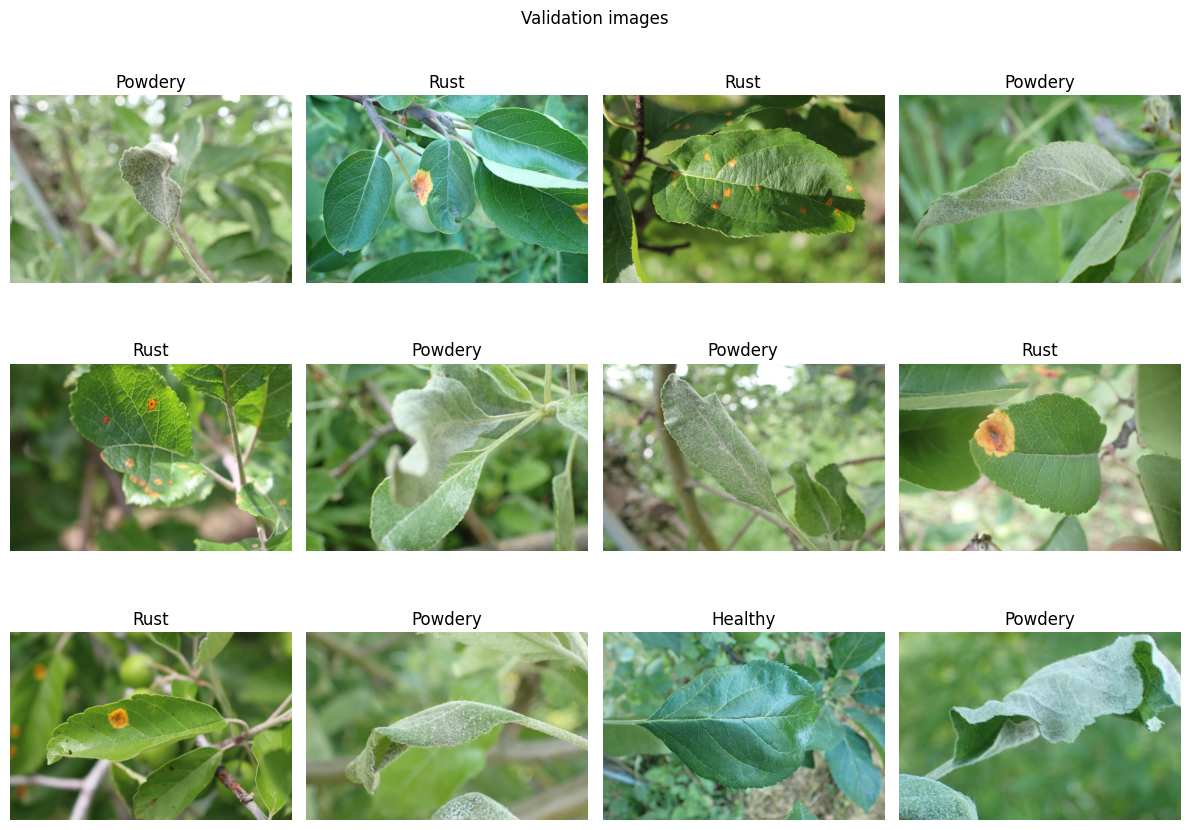

In [ ]:
import random
from PIL import Image


filenames = val_generator.filenames

# Randomly select 12 filenames (matching the 3x4 grid)
sampled_filenames = random.sample(filenames, 12)

rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 9))

for i, filename in enumerate(sampled_filenames):
    # Split the filename by the "/"
    parts = filename.split("/")

    # Take the first part of the split filename
    first_part = parts[0]

    # Combine the directory path with the first part
    image_path = val_dir+ "/" + filename

    # Load the image using PIL
    image = Image.open(image_path)

    # Determine the row and column for the current image
    row = i // cols
    col = i % cols

    # Display the image in the specified row and column
    axes[row, col].imshow(image)

    # Set the title to the first part of the filename
    axes[row, col].set_title(first_part)
    axes[row, col].axis('off')

plt.suptitle("Validation images")
plt.tight_layout()
plt.show()

### **Now lets start creating CNN Network**

In [ ]:
# Initializing the first CNN model
model1 = tf.keras.Sequential()

# Creating the CNN model
model1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.15))  # Adding dropout regularization throughout the model to deal with overfitting

# The second convolution
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.1))

# The third convolution
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.10))

# Flatten the results to feed into a DNN
model1.add(Flatten())

# 512 neuron hidden layer
model1.add(Dense(512, activation='relu'))

# 9 output neurons for the 9 classes
model1.add(Dense(3, activation='softmax'))  # Corrected to 9 output neurons

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 253, 253, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 126, 126, 16)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 126, 126, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 62, 62, 32)       

In [ ]:
model1.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=['accuracy'])

In [ ]:
history1=model1.fit(train_generator,validation_data=val_generator,epochs=35,batch_size=64)

Epoch 1/35
42/42 [==============================] - 103s 2s/step - loss: 2.6652 - accuracy: 0.3865 - val_loss: 1.1067 - val_accuracy: 0.3833
Epoch 2/35
42/42 [==============================] - 102s 2s/step - loss: 0.7456 - accuracy: 0.6399 - val_loss: 0.8507 - val_accuracy: 0.5667
Epoch 3/35
42/42 [==============================] - 101s 2s/step - loss: 0.5947 - accuracy: 0.7209 - val_loss: 0.8061 - val_accuracy: 0.5667
Epoch 4/35
42/42 [==============================] - 108s 3s/step - loss: 0.5769 - accuracy: 0.7451 - val_loss: 0.7240 - val_accuracy: 0.6333
Epoch 5/35
42/42 [==============================] - 109s 3s/step - loss: 0.5772 - accuracy: 0.7436 - val_loss: 0.8265 - val_accuracy: 0.5667
Epoch 6/35
42/42 [==============================] - 108s 3s/step - loss: 0.5625 - accuracy: 0.7504 - val_loss: 0.7961 - val_accuracy: 0.6500
Epoch 7/35
42/42 [==============================] - 101s 2s/step - loss: 0.5437 - accuracy: 0.7572 - val_loss: 0.5958 - val_accuracy: 0.7833
Epoch 8/35
42

In [ ]:
loss1,acc1=model1.evaluate(test_generator)

5/5 [==============================] - 9s 2s/step - loss: 0.3013 - accuracy: 0.9200


In [ ]:
print("Model1's Accuracy on Test:-",acc1)
print("Model1's Loss on Test:-",loss1)

Model1's Accuracy on Test:- 0.9200000166893005
Model1's Loss on Test:- 0.3013322651386261


In [ ]:
loss1_v,acc1_v=model1.evaluate(val_generator)

2/2 [==============================] - 4s 2s/step - loss: 0.3080 - accuracy: 0.9167


In [ ]:
print("Model1's Accuracy on val:-",acc1_v)
print("Model1's Loss on val:-",loss1_v)

Model1's Accuracy on val:- 0.9166666865348816
Model1's Loss on val:- 0.3080126941204071


In [ ]:
import matplotlib.pyplot as plt

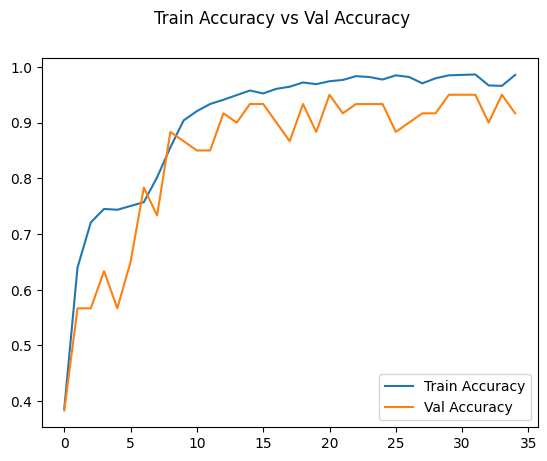

In [ ]:
plt.plot(history1.history['accuracy'],label="Train Accuracy")
plt.plot(history1.history['val_accuracy'],label="Val Accuracy")
plt.legend()
plt.suptitle("Train Accuracy vs Val Accuracy")
plt.show()


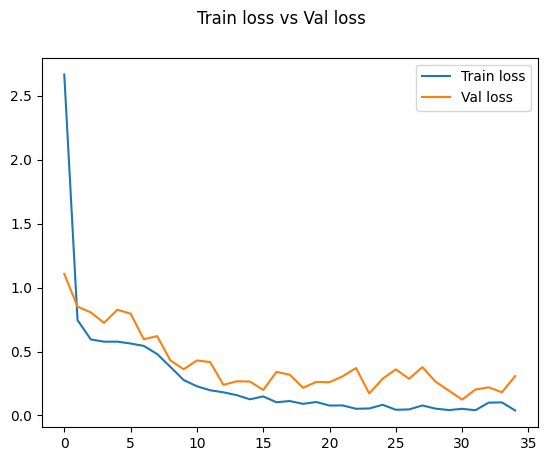

In [ ]:
plt.plot(history1.history['loss'],label="Train loss")
plt.plot(history1.history['val_loss'],label="Val loss")
plt.legend()
plt.suptitle("Train loss vs Val loss")
plt.show()

In [ ]:
y_pred_1=model1.predict(test_generator)

5/5 [==============================] - 11s 2s/step


#### **Prediction on sample image**

In [ ]:
test_1="/content/plant-disease-recognition-dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg"

In [ ]:
test_2="/content/plant-disease-recognition-dataset/Test/Test/Rust/85f6618e5784b9a3.jpg"

In [ ]:
test_3="/content/plant-disease-recognition-dataset/Validation/Validation/Powdery/9bae271592e9e4c2.jpg"

In [ ]:
def prediction_class(img_url,model,img_size):
  img_test_3=Image.open(img_url)
  plt.imshow(img_test_3)
  img_test_resized_3=img_test_3.resize(img_size)
  targeted_img_3=keras.preprocessing.image.img_to_array(img_test_resized_3)
  targeted_img_3 = np.expand_dims(targeted_img_3, axis=0)
  reslut_3=model1.predict(targeted_img_3)

  class_name={0:'Healthy', 1:'Powdery', 2:'Rust'}

  arr = np.array(reslut_3)

  # Find the maximum value
  max_value = np.max(arr)

  # Find the index of the maximum value
  max_index = np.argmax(arr)

  class_pred=class_name[max_index]

  context={"predicted value:- ":[list(r) for r in reslut_3],"Class name":class_pred}

  return context

1/1 [==============================] - 0s 90ms/step


{'predicted value:- ': [[0.0, 0.0, 1.0]], 'Class name': 'Rust'}

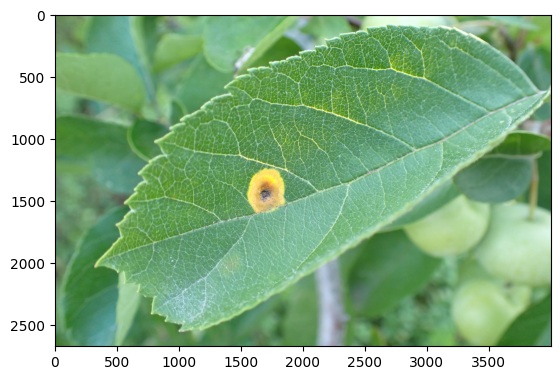

In [ ]:
prediction_class(test_2,model1,(255,255))

1/1 [==============================] - 0s 23ms/step


{'predicted value:- ': [[0.0, 1.0, 0.0]], 'Class name': 'Powdery'}

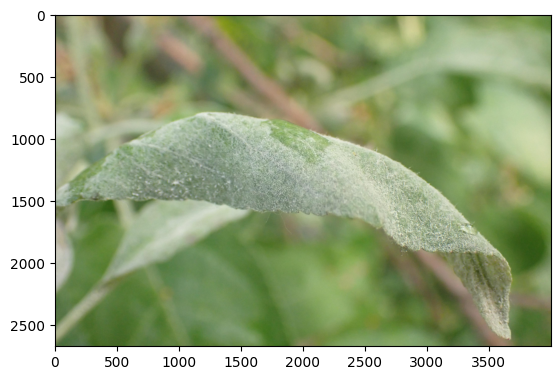

In [ ]:
prediction_class(test_3,model1,(255,255))

1/1 [==============================] - 0s 33ms/step


{'predicted value:- ': [[1.0, 0.0, 0.0]], 'Class name': 'Healthy'}

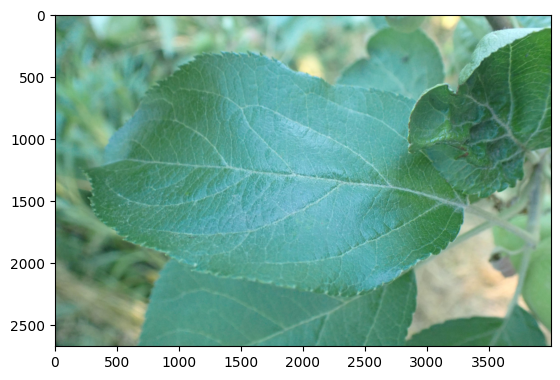

In [ ]:
prediction_class(test_1,model1,(255,255))

In [ ]:
# Assuming model1 is a trained TensorFlow model
model1.save("Plant_disase_model_2.h5")  # Save the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def model_size_reduce(model):
  pass

### **Quantization aware training** *(it is a technqiue to resize or reduce the size of deep learning model)*

Feature of this is following beloww:-
  
1. **Purpose:** Prepare models for efficient use with lower-precision hardware.
2. **Simulated Quantization:** Simulate quantization effects during training.
3. **Quantization-Aware Layers:** Special layers for simulating quantization.
4. **Training with Fake Quantization:** Use "fake quantization" to train with simulated quantization.

In [ ]:
!pip install tensorflow-model-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 4.8 MB/s eta 0:00:00


In [ ]:
## Reducing the model size
import tensorflow_model_optimization as tfmot

In [ ]:
quantize_model=tfmot.quantization.keras.quantize_model

q_aware_model=quantize_model(model1)

## again compiling it
q_aware_model.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLa  (None, 255, 255, 3)       3         
 yer)                                                            
                                                                 
 quant_conv2d_6 (QuantizeWr  (None, 253, 253, 16)      483       
 apperV2)                                                        
                                                                 
 quant_max_pooling2d_6 (Qua  (None, 126, 126, 16)      1         
 ntizeWrapperV2)                                                 
                                                                 
 quant_dropout_6 (QuantizeW  (None, 126, 126, 16)      1         
 rapperV2)                                                       
                                                                 
 quant_conv2d_7 (QuantizeWr  (None, 124, 124, 32)     

In [ ]:
history2=q_aware_model.fit(train_generator,validation_data=val_generator,epochs=5,batch_size=64)

Epoch 1/5
42/42 [==============================] - 113s 3s/step - loss: 0.0516 - accuracy: 0.9803 - val_loss: 0.3673 - val_accuracy: 0.8667
Epoch 2/5
42/42 [==============================] - 100s 2s/step - loss: 0.0500 - accuracy: 0.9849 - val_loss: 0.1739 - val_accuracy: 0.9500
Epoch 3/5
42/42 [==============================] - 106s 3s/step - loss: 0.0492 - accuracy: 0.9818 - val_loss: 0.2589 - val_accuracy: 0.9167
Epoch 4/5
42/42 [==============================] - 102s 2s/step - loss: 0.0477 - accuracy: 0.9871 - val_loss: 0.2847 - val_accuracy: 0.9333
Epoch 5/5
42/42 [==============================] - 99s 2s/step - loss: 0.0496 - accuracy: 0.9826 - val_loss: 0.3189 - val_accuracy: 0.9167


In [ ]:
##
converter=tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_q_aware_model=converter.convert()

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:947: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [ ]:
with open('tflite_qaware_model.tflite',"wb") as f:
  f.write(tflite_q_aware_model)